# Welcome to your first assignment of the SSL lecture

We are very glad, that you took the first step and opened this Jupyter Notebook successfully.

Please submit your solution of this notebook in the Whiteboard at the corresponding Assignment entry. We need you to upload the .ipynb-file and the exported .pdf of this notebook.

This and all the upcoming assignment notebooks will guide you (more or less) through the tasks we want you to solve. You sometimes will find some code snippets, which may help you to solve the tasks. But you are also free to implement your own functions, if you want to.

For the first week we want you implement and train a simple neural network with backpropagation, just like we did in the lecture. If you have any questions, ask them in either in the tutorials or in the "Mattermost" channel: https://mattermost.imp.fu-berlin.de/biorobotics/channels/ssl_ws_2324

The Exercise description states the **RESULT** we will grade.

## Slide Review

[Google Form](https://forms.gle/MstgymkWzPcWDFCa7) for the slide review. Please take one minute to scroll over the slides again and improve your lecture.

#### Please state both names of your group members here:
Authors: Aditya Panchal (Do not have a group mate yet :/)

# Assignment 1: Backpropagation
We recommend you read the chapter 7.3.3 of the Rojas book (https://www.inf.fu-berlin.de/inst/ag-ki/rojas_home/documents/1996/NeuralNetworks/neuron.pdf), and learn about the "matrix way" of implementing backprop.

## Ex. 1.1 XOR
Implement a two-layer artificial neural network with two input neurons and one output neuron. Choose the number of hidden neurons to your liking. Our goal is to learn the [XOR gate](https://en.wikipedia.org/wiki/XOR_gate). What does the untrained network (= random weights) return for all (four) combinations of inputs? **(RESULT)**

In [1]:
import matplotlib.pyplot as plt
import numpy

def sigmoid(z):
    return 1/(1 + numpy.exp(-z))

def softplus(z): # For the MNIST thingy
    return numpy.log(1 + numpy.exp(z))

def sigmoid_prime(z): # Derivative of sigmoid function
    return z * (1 - z)

def softplus_prime(z): # Derivate of the softplus function
    return sigmoid(-z)

class simpleNN():
    def __init__(self, inputs=2, hidden=2, outputs=1):
        self.n_input = inputs
        self.n_hidden = hidden
        self.n_output = outputs

        self.input_wt_matrix = numpy.random.uniform(size=(self.n_input, self.n_hidden))
        self.output_wt_matrix = numpy.random.uniform(size=(self.n_hidden, self.n_output))

    def predict(self, X, activation='sigmoid'):
        hidden_layer_input = numpy.dot(X, self.input_wt_matrix)
        if activation=='sigmoid':
            self.hidden_layer_output = sigmoid(hidden_layer_input)
        elif activation=='softplus':
            self.hidden_layer_output = softplus(hidden_layer_input)
        else:
            self.hidden_layer_output = hidden_layer_input

        final_layer_input = numpy.dot(self.hidden_layer_output, self.output_wt_matrix)
        if activation=='sigmoid':
            self.final_layer_output = sigmoid(final_layer_input)
        elif activation=='softplus':
            self.final_layer_output = softplus(final_layer_input)
        else:
            self.final_layer_output = final_layer_input
        return self.final_layer_output

    def get_error(self, predictions, true):
        return true - predictions

In [2]:
X = numpy.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = numpy.array([[0], [1], [1], [0]])

nn = simpleNN(2, 4, 1)

# Without activation
print("Random weights, without activation")
preds = nn.predict(X, activation='none')
print("Predictions: \n", preds)
err = nn.get_error(preds, y)
print("Errors: \n", err)
print(f"Mean Absolute Error: {abs(numpy.mean(err))}")

# With activation
print("\nRandom weights, with activation")
preds = nn.predict(X, activation='sigmoid')
print("Predictions: \n", preds)
err = nn.get_error(preds, y)
print("Errors: \n", err)
print(f"Mean Absolute Error: {abs(numpy.mean(err))}")

Random weights, without activation
Predictions: 
 [[0.        ]
 [1.54201331]
 [0.66820927]
 [2.21022258]]
Errors: 
 [[ 0.        ]
 [-0.54201331]
 [ 0.33179073]
 [-2.21022258]]
Mean Absolute Error: 0.6051112899457957

Random weights, with activation
Predictions: 
 [[0.73073591]
 [0.79594584]
 [0.7618617 ]
 [0.81719085]]
Errors: 
 [[-0.73073591]
 [ 0.20405416]
 [ 0.2381383 ]
 [-0.81719085]]
Mean Absolute Error: 0.2764335771460982


## Ex. 1.2 Backpropagation
Implement Backpropagation and optimize the weights of your neural network using the XOR training set:

### x, y

(0,0), 0

(0,1), 1

(1,0), 1

(1,1), 0

How many training iterations do you need? Plot the network error over the number of iterations! **(RESULT)**

In [3]:
def learn(self, X, y, n_iter=10000, activation='sigmoid'):
    errors = []
    for i in range(n_iter):
        preds = self.predict(X, activation=activation)
        err = self.get_error(preds, y)
        errors.append(abs(numpy.mean(err)))
        print(f"Iteration: {i}\tMean Absolute Error: {abs(numpy.mean(err))}") if i % (n_iter/10) == 0 else None

        # Backpropagation
        if activation == 'sigmoid':
            output_derivative = err * sigmoid_prime(preds)
        elif activation == 'softplus':
            output_derivative = err * softplus_prime(preds)
        else:
            output_derivative = err
        hidden_layer_err = numpy.dot(output_derivative, self.output_wt_matrix.T)
        if activation == 'sigmoid':
            hidden_layer_derivative = hidden_layer_err * sigmoid_prime(self.hidden_layer_output)
        elif activation == 'softplus':
            hidden_layer_derivative = hidden_layer_err * softplus_prime(self.hidden_layer_output)
        else:
            hidden_layer_derivative = hidden_layer_err
        self.output_wt_matrix += numpy.dot(self.hidden_layer_output.T, output_derivative)
        self.input_wt_matrix += numpy.dot(X.T, hidden_layer_derivative)

    print(f"\nFinal outputs: \n{preds}")
    print(f"Final MAE: {abs(numpy.mean(err))}")

    # Plotting the errors
    plt.plot(errors, color="#DD1010AA")
    plt.xlabel('Iterations')
    plt.ylabel('Mean Absolute Error')
    plt.hlines(0, 0, n_iter, linestyles='dashed', colors="#10101099")
    plt.title('Network Error vs No. of Iterations')
    plt.show()

Iteration: 0	Mean Absolute Error: 0.33127625159080537
Iteration: 100	Mean Absolute Error: 0.003387207303937892
Iteration: 200	Mean Absolute Error: 0.00504549768992632
Iteration: 300	Mean Absolute Error: 0.011013831518244158
Iteration: 400	Mean Absolute Error: 0.015534318686530824
Iteration: 500	Mean Absolute Error: 0.008840246283900122
Iteration: 600	Mean Absolute Error: 0.006324274468715772
Iteration: 700	Mean Absolute Error: 0.006338534868364276
Iteration: 800	Mean Absolute Error: 0.0055819235538612025
Iteration: 900	Mean Absolute Error: 0.0048562628381054115

Final outputs: 
[[0.1280217 ]
 [0.91423904]
 [0.91454116]
 [0.06027635]]
Final MAE: 0.00426956099128723


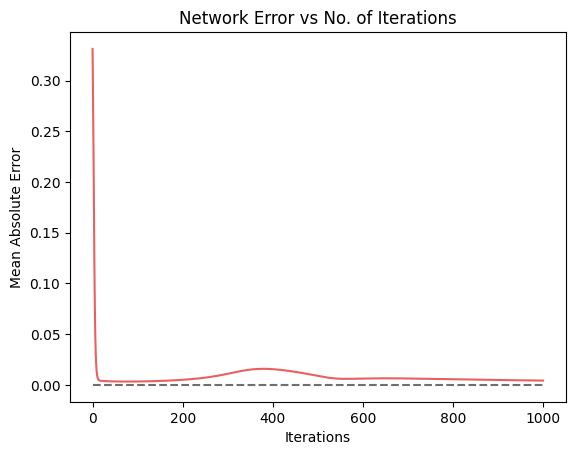

In [4]:
simpleNN.learn = learn

nn = simpleNN(2, 4, 1)
X = numpy.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = numpy.array([[0], [1], [1], [0]])
nn.learn(X, y, n_iter=1000, activation='sigmoid')

From above, a good number of training iterations seems to be >500

# Ex. 1.3 MNIST (BONUS)
Train your network on the MNIST dataset and state the model accuracy (or the model error) for the training and test sets. **(RESULT)** You can download the dataset using the [PyTorch library](https://pytorch.org/vision/0.15/generated/torchvision.datasets.MNIST.html).

Compare your results to this [list](https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#4d4e495354).


Iteration: 0	Mean Absolute Error: 0.8999983402494681


<ipython-input-1-f5aec2089697>:5: RuntimeWarning: overflow encountered in exp
  return 1/(1 + numpy.exp(-z))


Iteration: 40	Mean Absolute Error: 7.948464674150667e-09
Iteration: 80	Mean Absolute Error: 1.8131100025709502e-08
Iteration: 120	Mean Absolute Error: 0.1000000000000558
Iteration: 160	Mean Absolute Error: 0.1000000000000558
Iteration: 200	Mean Absolute Error: 0.1000000000000558
Iteration: 240	Mean Absolute Error: 0.1000000000000558
Iteration: 280	Mean Absolute Error: 0.1000000000000558
Iteration: 320	Mean Absolute Error: 0.1000000000000558
Iteration: 360	Mean Absolute Error: 0.1000000000000558

Final outputs: 
[[5.57300638e-013 0.00000000e+000 2.87164229e-228 ... 0.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [5.57300638e-013 0.00000000e+000 2.87164229e-228 ... 0.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [5.57300638e-013 0.00000000e+000 2.87164229e-228 ... 0.00000000e+000
  1.00000000e+000 1.00000000e+000]
 ...
 [5.57300638e-013 0.00000000e+000 2.87164229e-228 ... 0.00000000e+000
  1.00000000e+000 1.00000000e+000]
 [5.57300638e-013 0.00000000e+000 2.87164229e-228 ... 0.00

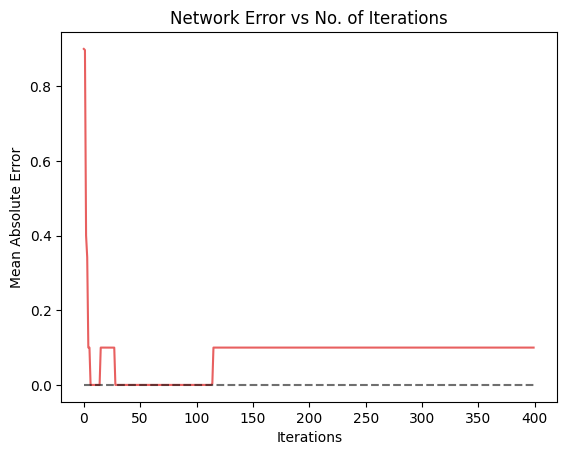

Accuracy: 0.0974


In [5]:
# Loading the MNIST dataset
from keras.datasets import mnist
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# For the MNIST dataset, we consider a simple NN of 784 input nodes, 30 hidden nodes and 10 output nodes
mnistNN = simpleNN(784, 30, 10)

# Normalizing the data
X_train = X_train / 255
X_test = X_test / 255

# Reshape the training data and test data
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# One-hot encoding the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Training the network
mnistNN.learn(X_train, y_train, n_iter=400, activation='sigmoid')

# Testing the network
preds = mnistNN.predict(X_test, activation='sigmoid')

# Calculating the accuracy
correct = 0
for i in range(len(preds)):
    if numpy.argmax(preds[i]) == numpy.argmax(y_test[i]):
        correct += 1
print(f"Accuracy: {correct/len(preds)}")

We can see that the accuracy of our model is quite low, which is understandable as it a rather simple one. It could also be the case of the activation function used (here sigmoid as softplus was giving some errors)